<a href="https://colab.research.google.com/github/Trajanolc/Soja_Milho_Visualization/blob/master/Analise_Exporta%C3%A7%C3%A3o_Por_porto_Santar%C3%A9m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
url = 'http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_COMPLETA.zip'
df = pd.read_csv(url,sep=';')
df.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,3,41043911,15,149,RS,1,1010500,3987,4150,16725
1,1997,5,63019000,10,97,MG,7,145200,0,1002,8420
2,1997,6,87168000,11,586,RS,7,145300,48,153,915
3,1997,8,39162000,10,249,SP,1,817800,0,138,586
4,1997,2,73130000,10,63,SP,7,1010900,0,2714,1972


In [4]:
df_sant = df[df['CO_URF']==210200] #Codigo de BRSTM retirado do arquivo TABELAS_AUXILIARES Sheet 16
df_sant['CO_VIA'].unique() #De acordo com o TABELAS_AUXILIARES corresponde a maritima, fluvial, meios proprio e não declarado
# Vou manter todos por enquanto

array([2, 1, 9, 0])

In [0]:
NCM = pd.read_csv('http://www.mdic.gov.br/balanca/bd/tabelas/NCM.csv',sep=';',encoding='latin-1') #import dicionário de NCM e dá merge
NCM_clean = NCM[['CO_NCM','NO_NCM_POR']].copy()
sant = df_sant.merge(NCM_clean,left_on='CO_NCM',right_on='CO_NCM')
sant.columns = ['Ano','Mes','NCM','UNID','Pais','UF','Via','URF','Qnt_Estat','KG','VL_FOB','Desc']

In [0]:
sant['NCM'] = sant['NCM'].apply(lambda x: str(x).zfill(8)[:4]) #Normaliza NCM pra 8 digitos e pega os 4 primeiros, conhecido como SH4
sant_grao = sant[sant['NCM'].isin(['1201','1005'])] #soja e milho, respectivamente

pais = pd.read_csv('http://www.mdic.gov.br/balanca/bd/tabelas/PAIS.csv',sep=';',encoding='latin-1') #importa dicionário de países
pais = pais[['CO_PAIS','NO_PAIS']]

sant_grao=sant_grao.merge(pais,left_on='Pais',right_on='CO_PAIS')
sant_grao.drop(axis=1,labels=['Pais','CO_PAIS','URF','UNID'],inplace=True)


In [0]:
sant_grao['Data'] = sant_grao.apply(lambda x: pd.to_datetime(str(x['Mes']) +'/'+ str(x['Ano'])),axis=1)
#coluna data usando o formato datetime
sant_grao.to_csv('graos_santarem.csv')

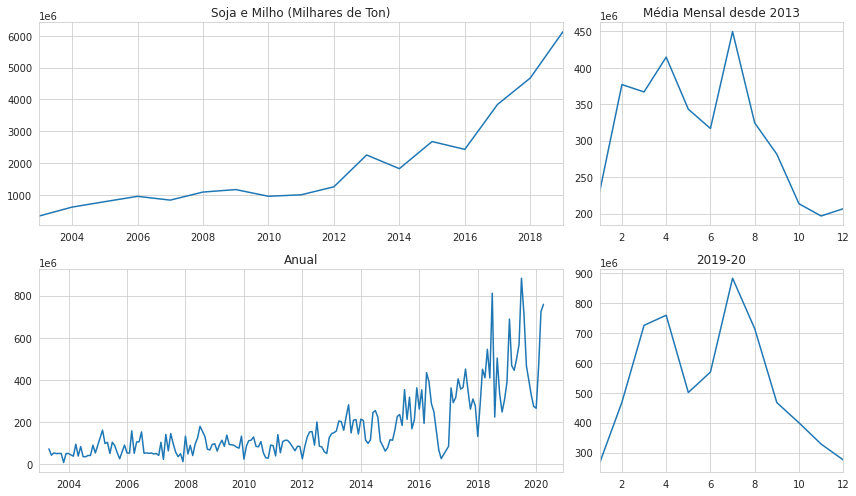

In [8]:
plt.figure(figsize=(12,7))

ax1 = plt.subplot2grid((2, 3), (0, 0),colspan=2)
ax1.set_title('Soja e Milho (Milhares de Ton)')
ax1.ticklabel_format(axis='y',scilimits=(6,6))
ax1.set_xlim([2003,2019])

ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.set_title('Média Mensal desde 2013')
ax2.ticklabel_format(axis='y',scilimits=(6,6))
ax2.set_xlim([1,12])

ax3 = plt.subplot2grid((2, 3), (1, 0),  colspan=2)
ax3.ticklabel_format(axis='y',scilimits=(6,6))
ax3.set_title('Anual')
ax3.set_xlim([datetime.date(2003,1,1),datetime.date(2020,12,1)])

ax4 = plt.subplot2grid((2, 3), (1, 2))
ax4.set_title('2019-20')
ax4.ticklabel_format(axis='y',scilimits=(6,6))
ax4.set_xlim([1,12])



sns.lineplot(data=sant_grao.groupby('Ano').sum()['KG'],ax=ax1)
sns.lineplot(data=sant_grao[(sant_grao['Ano']>=2013)].groupby('Mes').sum()['KG']/7,ax=ax2)
sns.lineplot(data=sant_grao.groupby('Data').sum()['KG'],ax=ax3)
sns.lineplot(data=sant_grao[sant_grao['Data']>"2019-04-01"].groupby('Mes').sum()['KG'],ax=ax4)

#sns.lineplot(data=sant_grao[(sant_grao['NCM']==NCM_Code) & (sant_grao['Ano']>=2019)].groupby('Data').sum()['KG'],ax=ax4)

plt.tight_layout()
#Soja e Milho somados

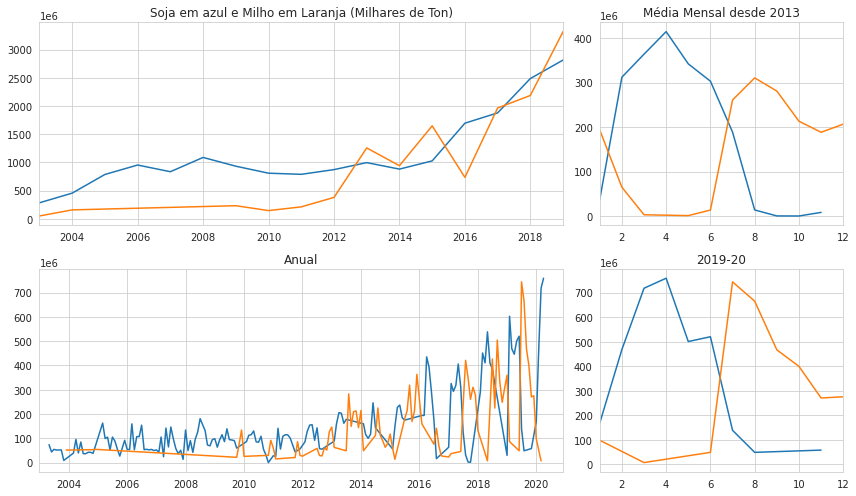

In [9]:
Soja = str(1201)
Milho = str(1005)

plt.figure(figsize=(12,7))

ax1 = plt.subplot2grid((2, 3), (0, 0),colspan=2)
ax1.set_title('Soja em azul e Milho em Laranja (Milhares de Ton)')
ax1.ticklabel_format(axis='y',scilimits=(6,6))
ax1.set_xlim([2003,2019])

ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.set_title('Média Mensal desde 2013')
ax2.ticklabel_format(axis='y',scilimits=(6,6))
ax2.set_xlim([1,12])

ax3 = plt.subplot2grid((2, 3), (1, 0),  colspan=2)
ax3.ticklabel_format(axis='y',scilimits=(6,6))
ax3.set_title('Anual')
ax3.set_xlim([datetime.date(2003,1,1),datetime.date(2020,12,1)])

ax4 = plt.subplot2grid((2, 3), (1, 2))
ax4.set_title('2019-20')
ax4.ticklabel_format(axis='y',scilimits=(6,6))
ax4.set_xlim([1,12])





sns.lineplot(data=sant_grao[sant_grao['NCM']==Soja].groupby('Ano').sum()['KG'],ax=ax1)
sns.lineplot(data=sant_grao[(sant_grao['NCM']==Soja)&(sant_grao['Ano']>=2013)].groupby('Mes').sum()['KG']/7,ax=ax2)
sns.lineplot(data=sant_grao[sant_grao['NCM']==Soja].groupby('Data').sum()['KG'],ax=ax3)
sns.lineplot(data=sant_grao[(sant_grao['NCM']==Soja)&(sant_grao['Data']>"2019-04-01")].groupby('Mes').sum()['KG'],ax=ax4)


sns.lineplot(data=sant_grao[sant_grao['NCM']==Milho].groupby('Ano').sum()['KG'],ax=ax1)
sns.lineplot(data=sant_grao[(sant_grao['NCM']==Milho)&(sant_grao['Ano']>=2013)].groupby('Mes').sum()['KG']/7,ax=ax2)
sns.lineplot(data=sant_grao[sant_grao['NCM']==Milho].groupby('Data').sum()['KG'],ax=ax3)
sns.lineplot(data=sant_grao[(sant_grao['NCM']==Milho)&(sant_grao['Data']>"2019-04-01")].groupby('Mes').sum()['KG'],ax=ax4)
# após o mês 04 é 2019, antes é 2020


plt.tight_layout()
#Soja e Milho Separados

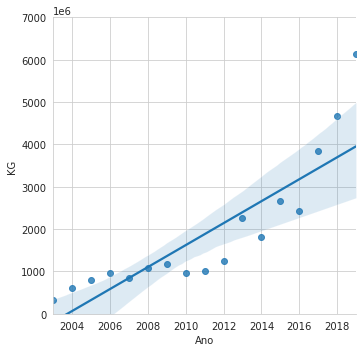

In [10]:
sns.lmplot(data=sant_grao[(sant_grao['Ano']<=2019)].groupby('Ano').sum().reset_index(),y='KG',x='Ano',robust=True)
plt.ticklabel_format(axis='y',scilimits=(6,6))
plt.ylim([0,7000000000])
plt.show()

In [0]:
def func(x,n1,n2,a1,a2,b1,b2,c,d,e,f):
  retorno = ((a1)*(-np.cos((n1*x/12)*np.pi*2)+1) + (b1)*(-np.sin((n1*x/12)*np.pi*2)+1) + \
             (a2)*(-np.cos((n2*x/12)*np.pi*2)+1) + (b2)*(-np.sin((n2*x/12)*np.pi*2)+1) ) *\
            (( (-f*x) + x/e)**2) *d + c
  retorno = pd.Series(retorno).map(lambda x: 0 if (x < 0) else x)
  return retorno

##Soja

In [0]:
ano_pesquisa = 2009

dfSoja['mesNorm'] = (dfSoja['Ano']-ano_pesquisa)*12 + dfSoja['Mes'] 
coef = 2020 - ano_pesquisa #meses a partir do ano de pesquisa que resultam em 2020
new_index = range(0*12,12*coef)
predSoja_train = dfSoja[(dfSoja['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
new_index = range(12*coef+1,12*coef+5)
predSoja_test = dfSoja[(dfSoja['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
   

RMSE: 52.88126010042527 mil ton


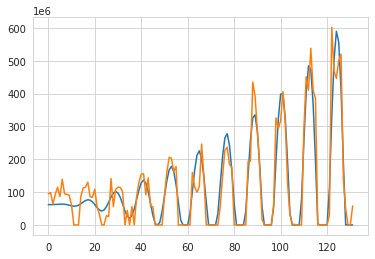

In [112]:
popts, pcov = curve_fit(func, predSoja_train.index, predSoja_train.values,maxfev=6000,absolute_sigma=True)

plt.plot(predSoja_train.index, func(predSoja_train.index, *popts))
plt.plot(predSoja_train)
plt.ticklabel_format(axis='y',scilimits=(6,6))

RMSE = sqrt(mean_squared_error(predSoja_train, func(predSoja_train.index, *popts)))
print(f'RMSE: {RMSE/1000000} mil ton')

RMSE: 54 mil ton
Erro máximo: 88 mil ton


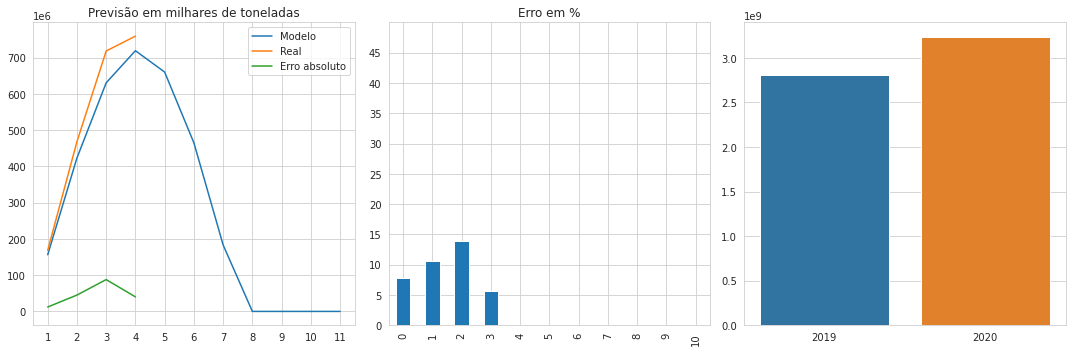

A exportação de soja esperada para 2020 será de 3,236 mil ton, 423 mil ton acima de 2019.


In [113]:
erro = pd.Series(data=(func(range(12*coef+1,12*coef+12), *popts) - predSoja_test.reset_index(drop=True).fillna(0)).apply(lambda x: sqrt(x**2)))
plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)



plt.plot(range(12*coef+1,12*coef+12), func(range(12*coef+1,12*coef+12), *popts), label='Modelo')
plt.plot(predSoja_test, label='Real')
plt.plot(range(12*coef+1,12*coef+12),erro,label='Erro absoluto')
RMSE = sqrt(mean_squared_error(predSoja_test, func(predSoja_test.index, *popts)))
plt.legend()
plt.ticklabel_format(axis='y',scilimits=(6,6))
plt.title('Previsão em milhares de toneladas')
plt.xticks(range(12*coef+1,12*coef+12),range(1,12))
print(f'RMSE: {format(RMSE/1000000,".0f")} mil ton')
print(f'Erro máximo: {format(erro.max()/1000000,".0f")} mil ton')

ax2 = plt.subplot(132)
((erro/func(range(12*coef+1,12*coef+12), *popts)).fillna(0)*100).plot(kind='bar')
plt.ylim([0,50])
plt.yticks(np.arange(0,50,step=5))
plt.title('Erro em %')


ax3 = plt.subplot(133)
exp_2020 = sum(func(range(12*coef+1,12*coef+12), *popts))
exp_2019 = sum(sant_grao[(sant_grao['NCM']==Soja)&(sant_grao['Ano']==2019)].groupby('Data').sum()['KG'])

sns.barplot(x=[2019,2020],y=[exp_2019,exp_2020],ax=ax3)

plt.tight_layout()
plt.show()

print(f'A exportação de soja esperada para 2020 será de {exp_2020/1000000:,.0f} mil ton, {(exp_2020-exp_2019)/1000000:,.0f} mil ton acima de 2019.')



#Milho


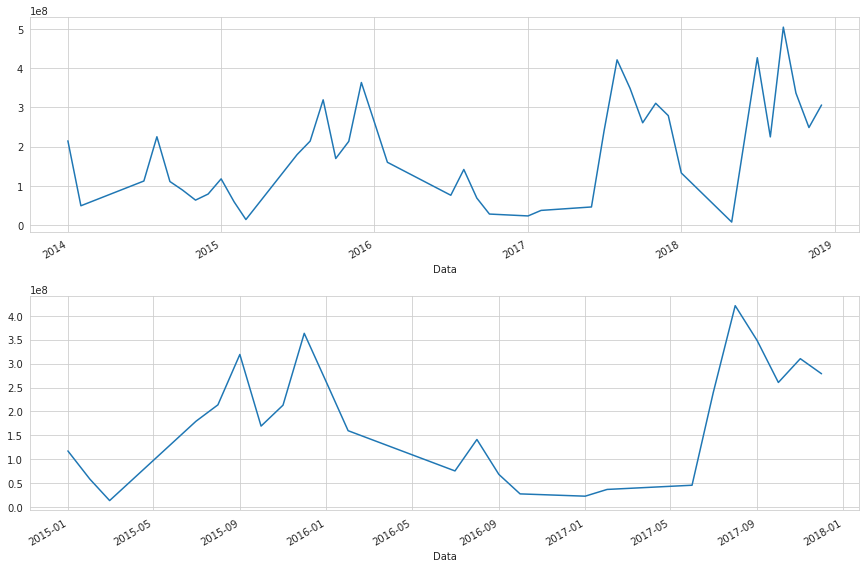

In [16]:
dfMilho = sant_grao[(sant_grao['NCM']==Milho)].copy()
plt.figure(figsize = (12,8))
ax1 = plt.subplot(211)
dfMilho[(dfMilho['Ano'] >= 2014)&(dfMilho['Ano'] <= 2018)].groupby('Data').sum()['KG'].plot()
ax2 = plt.subplot(212)
dfMilho[(dfMilho['Ano'] >= 2015)&(dfMilho['Ano'] <= 2017)].groupby('Data').sum()['KG'].plot()
plt.tight_layout()

A correção será feita entre o mês 05 de 2016 e 05 de 2017, pegando a média entre os anos anterior e posterior a aquele mês.


In [0]:
def func(x,n1,n2,a1,a2,b1,b2,c,d,e,f):
  retorno = ((a1)*(-np.cos((n1*x/12)*np.pi*2)+1) + (b1)*(-np.sin((n1*x/12)*np.pi*2)+1) + \
             (a2)*(-np.cos((n2*x/12)*np.pi*2)+1) + (b2)*(-np.sin((n2*x/12)*np.pi*2)+1) )*\
            (( (-f*x) + x/e)**2) *d + c
  retorno = pd.Series(retorno).map(lambda x: 0 if (x < 0) else x)
  return retorno

In [0]:
ano_pesquisa = 2009
dfMilho['mesNorm'] = (dfMilho['Ano']-ano_pesquisa)*12 + dfMilho['Mes'] 
coef = 2020 - ano_pesquisa #meses a partir do ano de pesquisa que resultam em 2020
coef_2016 = 2016 - ano_pesquisa #meses a partir do ano de pesquisa que resultam em 2016
new_index = range(0*12,12*coef)
predMilho_train = dfMilho[(dfMilho['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
new_index = range(12*coef+1,12*coef+4)
predMilho_test = dfMilho[(dfMilho['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
 
for n in range(coef_2016*12+5,coef_2016*12+5+12): #ajuste de 2016
  predMilho_train[n] = (predMilho_train[n-12] + predMilho_train[n+12])/2


RMSE: 74.42372162048565 mil ton


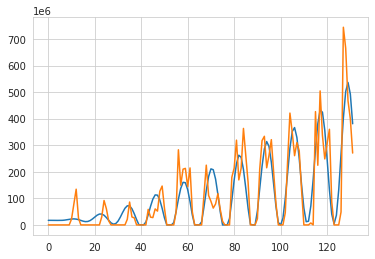

In [58]:
poptm, pcov = curve_fit(func, predMilho_train.index, predMilho_train.values,maxfev=6000)

plt.plot(predMilho_train.index, func(predMilho_train.index, *poptm))
plt.plot(predMilho_train)
plt.ticklabel_format(axis='y',scilimits=(6,6))

RMSE = sqrt(mean_squared_error(predMilho_train, func(predMilho_train.index, *poptm)))
print(f'RMSE: {RMSE/1000000} mil ton')

RMSE: 7 mil ton
Erro máximo: 9 mil ton


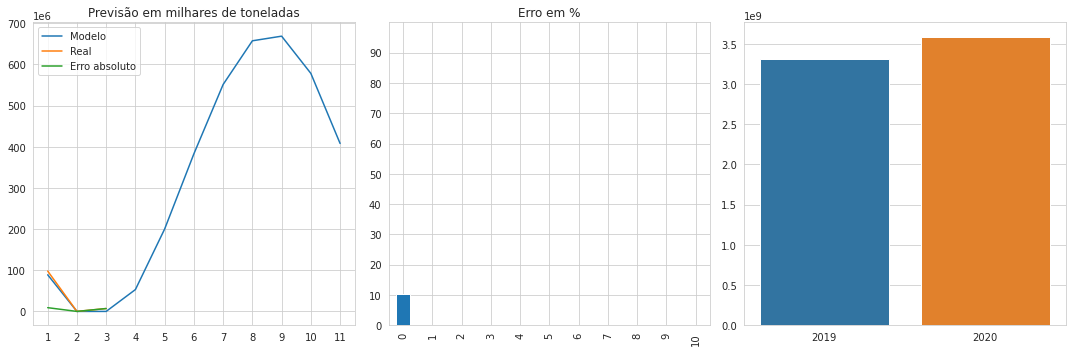

A exportação de Milho esperada para 2020 será de 3,589 mil ton, 272 mil ton acima de 2019.


In [59]:
erro = pd.Series(data=(func(range(12*coef+1,12*coef+12), *poptm) - predMilho_test.reset_index(drop=True).fillna(0)).apply(lambda x: sqrt(x**2)))
plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)



plt.plot(range(12*coef+1,12*coef+12), func(range(12*coef+1,12*coef+12), *poptm), label='Modelo')
plt.plot(predMilho_test, label='Real')
plt.plot(range(12*coef+1,12*coef+12),erro,label='Erro absoluto')
RMSE = sqrt(mean_squared_error(predMilho_test, func(predMilho_test.index, *poptm)))
plt.legend()
plt.ticklabel_format(axis='y',scilimits=(6,6))
plt.title('Previsão em milhares de toneladas')
plt.xticks(range(12*coef+1,12*coef+12),range(1,12))
print(f'RMSE: {format(RMSE/1000000,".0f")} mil ton')
print(f'Erro máximo: {format(erro.max()/1000000,".0f")} mil ton')

ax2 = plt.subplot(132)
((erro/func(range(12*coef+1,12*coef+12), *poptm)).fillna(0)*100).plot(kind='bar')
plt.ylim([0,100])
plt.yticks(np.arange(0,100,step=10))
plt.title('Erro em %')


ax3 = plt.subplot(133)
exp_2020 = sum(func(range(12*coef+1,12*coef+12), *poptm))
exp_2019 = sum(sant_grao[(sant_grao['NCM']==Milho)&(sant_grao['Ano']==2019)].groupby('Data').sum()['KG'])

sns.barplot(x=[2019,2020],y=[exp_2019,exp_2020],ax=ax3)

plt.tight_layout()
plt.show()

print(f'A exportação de Milho esperada para 2020 será de {exp_2020/1000000:,.0f} mil ton, {(exp_2020-exp_2019)/1000000:,.0f} mil ton acima de 2019.')

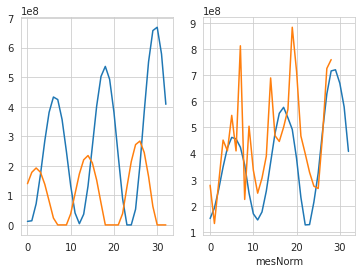

In [109]:
fase=3
ax1 = plt.subplot(121)
plt.plot( func(range(12*coef+fase-24,12*coef+12), *poptm), label='Modelo milho')
plt.plot( func(range(12*coef+fase-24,12*coef+12), *popts), label='Modelo Soja')

ax2 = plt.subplot(122)
total = func(range(12*coef+fase-24,12*coef+12), *popts) + func(range(12*coef+fase-24,12*coef+12), *poptm)
plt.plot(total)

ano_test = 2018
coefg = 2020 - ano_test
sant_grao['mesNorm'] = (sant_grao['Ano'].apply(lambda x: int(x))-ano_test)*12 + sant_grao['Mes'].apply(lambda x: int(x))
new_index = range(0*12,12*coefg+5)
graos_total = sant_grao[(sant_grao['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
graos_total.plot()

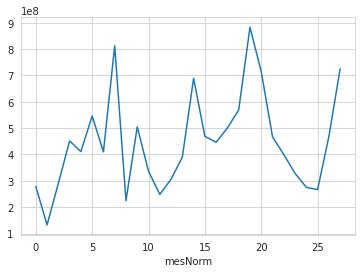

In [107]:
ano_test = 2018
coefg = 2020 - ano_test
sant_grao['mesNorm'] = (sant_grao['Ano'].apply(lambda x: int(x))-ano_test)*12 + sant_grao['Mes'].apply(lambda x: int(x))
new_index = range(0*12,12*coefg+4)
graos_total = sant_grao[(sant_grao['mesNorm']>=0)].groupby(['mesNorm']).sum()['KG'].reindex(new_index, fill_value=0)
graos_total.plot()

In [108]:
sant_grao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 0 to 1627
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ano        1628 non-null   int64         
 1   Mes        1628 non-null   int64         
 2   NCM        1628 non-null   object        
 3   UF         1628 non-null   object        
 4   Via        1628 non-null   int64         
 5   Qnt_Estat  1628 non-null   int64         
 6   KG         1628 non-null   int64         
 7   VL_FOB     1628 non-null   int64         
 8   Desc       1628 non-null   object        
 9   NO_PAIS    1628 non-null   object        
 10  Data       1628 non-null   datetime64[ns]
 11  mesNorm    1628 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 165.3+ KB
